## Análise de Compra e Venda das Ações 
### Dados de Petróleo e Gás e que lidam com a Exploração, Refino e Distribuição

**RRRP: 3R PETROLEUM ÓLEO E GÁS S.A**
1. Atividade Principal:
    - Exploração e produção de petróleo e gás natural.

**CSAN: COSAN S.A.**
1. Atividade Principal:
    - Produção de Açúcar. Etanol e Cogeração de Energia. Distribuição de Combustíveis.Produção e Distribuição de Lubrificantes.Tranporte e Carregamento de Açúcar. Operador de Terras e Distribuição de Gás.
    
**DMMO: DOMMO ENERGIA S.A.**
1. Atividade Principal:
    - A Companhia terá por objeto a exploração. produção e comercialização de petróleo e seus derivados. gás natural e outros hidrocarbonetos fluidos.
    
**ENAT: ENAUTA PARTICIPAÇÕES S.A.**
1. Atividade Principal:
    - Participação em sociedades que se dediquem à exploração. produção e comercialização de petróleo. gás natural e seus derivados. seja como sócia ou acionista ou outras formas de associações.
    
**PRIO: PETRO RIO S.A.**
1. Atividade Principal:
    - A Companhia tem por objeto a participação em outras sociedades como sócia. acionista ou quotista. no país ou no exterior. desde que visando à consecução de atividades relacionadas à energia.
    
**PETR: PETROLEO BRASILEIRO S.A. PETROBRAS**
1. Atividade Principal:
    - Pesquisa. lavra. refinação. processamento. comércio e transporte de petróleo. de seus derivados. de gás natural e de outros hidrocarbonetos fluidos. além das atividades vinculadas à energia.
   
**RECV: PETRORECÔNCAVO S.A.**
1. Atividade Principal:
    - Exploração e produção de petróleo e gás natural
    
**RPMG: REFINARIA DE PETROLEOS MANGUINHOS S.A.**
1. Atividade Principal:
    - Fabricação de produtos de refino de petróleo.

**UGPA: ULTRAPAR PARTICIPACOES S.A.**
1. Atividade Principal:
    - Atuação em energia e infraestrutura por meio da Ipiranga. Ultragaz e Ultracargo. especialidades químicas através da Oxiteno e varejo farmacêutico com a Extrafarma.
   
**VBBR: VIBRA ENERGIA S.A.**
1. Atividade Principal:
    - Distribuição e venda de álcool carburante. biodísel. gasolina e demais derivados de petróleo. incluindo lubrificantes. assim como gás natural.


## Estratégia de Desenvolvimento

**1. Simular uma estratégia (backtest) de compra e venda usando as Bandas de Bollinger para as empresas do setor listadas na bolsa. Para o backtest, use o período mínimo de 1 ano.**

    1. Instalação de Bibliotecas.
    2. Importação das Bibliotecas.
    2. Criação de uma função chamada "importa_acao" que vai importar os dados de uma das ações da lista acima no perído de 1 ano.
    3. Criação de uma função chamada "calculos_principais" que fará cálculos importantes para o plot do Gráfico de Bollling.
    4. Criação de uma função chamada "grafico_bollinger" que cria o gráfico de Bollinger.
    5. Criação de uma função chamada "executa_funcoes_bollinger" ela chama todas as outras funções acima e executa o Backtesting utilizando as Bandas de Bollinger.


**2. Fazer uma análise exploratória com o objetivo de levantar hipóteses e entender as variações de preço do setor.**

    1. Criação de uma função chamada "compara_acoes" essa função vai comparar o preço de cada ação.
    2. Criar um gráfico que compara o preço de todas as ações:
    3. Analizar os Quartis, a Média, a Mediana e o Desvio Padrão de cada ação.
    4. Gerar gráficos bloxplots para identificar outliers.
    5. Identificar qual ação tem maior variação de Preço (Ação com Maior Risco de Investimento).
    6. Hipótese 1: Os títulos com retornos positivos no último ano darão retornos positivos no próximo mês?
    
**3. Selecionar ou criar uma nova estratégia baseada em suas análises.**

    1. Gerar os gráficos de Bolling de compra e venda de Ações das previsões.
    2. Mostrar esses dados de compra e venda comparando as ações em um único gráfico
    3. Identificar quais ações tiveram o maior lucro baseando-se na estratégia de Backtest usando as Bandas de Bollinger

**4. Comparar e analisar a performance das duas estratégias nas empresas do setor.**

    1. Escolher qual é ação é a mais lucrativa comprar com base nos resultados do modelo e das análises anteriores.

**Instalação de Bibliotecas**
- !pip install yfinance
- !pip install plotly
- !pip uninstall matplotlib
- !pip install matplotlib==3.2.2
- !pip install fastquant

In [ ]:
# !pip3 install --upgrade pip
# !pip install --upgrade fastquant
# !pip uninstall matplotlib
# !pip install matplotlib==3.2.2
# !pip install fastquant

In [55]:
## Importar as bibliotecas
import yfinance as yf

## Biblioteca para Realizar o backtest com bandas de bollinger
from fastquant import backtest

## Manipulação de Dados
import pandas as pd
import numpy as np

## Plotar no Gráfico 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Cria lista com o nome de ações
lista_acoes = ['RRRP3.SA','CSAN3.SA','DMMO3.SA','ENAT3.SA','PRIO3.SA','PETR3.SA','RECV3.SA','RPMG3.SA','UGPA3.SA','VBBR3.SA']
lista_cores = ['#636EFA',  '#FECB52','#00CC96', '#EF553B',   'red',    'blue',     'green', 'white',    'orange', 'purple']

In [3]:
## Definindo funções básicas
## Função que importa uma determinada ação
def importa_acao(nome_acao):
    ## Importa dados de um ano da Ação RRRP3
    acao = yf.Ticker(nome_acao)
    ## Seleciona o período de 1 ano
    df = acao.history(period='1y')
    ## Filtra a coluna de fechamento
    df = df[['Close']]
    return df

In [4]:
## Definindo funções de cálculos para o gráfico de Bollinger
def calculos_principais(df):
    
    ## Calcula a média móvel
    mm = df.rolling(window=20).mean()
    
    ## Cálculo do Desvio Padrão
    dpm = df.rolling(window=20).std()
    
    ## Cáculo da Banda Superior
    sup_band = mm + 2 * dpm
    
    ## Cáculo da Banda Inferior
    inf_band = mm - 2 * dpm
    
    ## Renomeando a coluna Close da Banda Superior
    sup_band = sup_band.rename(columns = {'Close': 'superior'})
    ## Renomeando a coluna Close da Banda Inferior
    inf_band = inf_band.rename(columns = {'Close': 'inferior'})
    
    ## Unir as colunas
    bandas_bollinger = df.join(sup_band).join(inf_band)
    
    ## Retirar os valores nulos
    bandas_bollinger.dropna(inplace = True)
    
    ## Cálculo de pontos de Compra
    compra = bandas_bollinger[bandas_bollinger['Close'] <= bandas_bollinger['inferior'] ]
    ## Cálculo de pontos de Venda 
    venda = bandas_bollinger[bandas_bollinger['Close'] >= bandas_bollinger['superior'] ]
    
    ## Renomeando as colunas
    compra.columns = ['Compra','superior','inferior']
    venda.columns = ['Venda','superior','inferior']
    
    ## Juntando os dados da banda inferior e superior
    df_inf_sup_band = df.merge(sup_band, how='inner', on='Date').merge(inf_band, how='inner', on='Date')
    
    ## Juntando os dados compra e venda
    df_compra_venda = df.merge(compra['Compra'], how='inner', on='Date').merge(venda['Venda'], how='inner', on='Date')
    
    return mm, dpm, sup_band, inf_band, compra, venda, df_inf_sup_band,df_compra_venda

In [5]:
def grafico_bollinger(nome_acao,inf_band,sup_band,df,mm,compra,venda, df_inf_sup_band,df_compra_venda): 
    # Tamanho do gráfico
    plt.figure(figsize=(18,9))
    # Cor de fundo
    plt.style.use('dark_background')
    # Título
    plt.title('Ação ' + nome_acao, size = 30, loc='left')
    
    ## Plot Preço Ação
    plt.plot(df.index, df['Close'], color = '#636EFA', label='Preço Superior',)
    
    ## Plot da banda superior
    plt.plot(df.index, sup_band, label='Banda Superior',  alpha=0.2)
    
    ## Plot da banda inferior
    plt.plot(df.index, inf_band, label='Banda Inferior', alpha=0.2)
    
    ## Plot da média móvel
    plt.plot(df.index, mm, label='Média Móvel', color = '#FECB52')
    
    ## Plot do Preço superior
    plt.fill_between(df.index, df_inf_sup_band['inferior'], df_inf_sup_band['superior'], color='grey', alpha=0.5)

    ## Plota os Sinais de compra
    plt.scatter(compra.index, compra['Compra'], label='Compra',color='#00CC96', marker='o')
    
    ## Plota os Sinais de venda
    plt.scatter(venda.index, venda['Venda'], label='Venda',color='#EF553B', marker='o')

    ## Mostra o grid 
    plt.grid(visible=True, which='major', axis='both',color = '#636EFA',  alpha=0.5)

    ## Retira as bordas inferiores, superiores e laterais
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.legend()
    plt.show()

In [6]:
def compara_acoes():
    # Tamanho do gráfico
    plt.figure(figsize=(18,9))
    # Cor de fundo
    plt.style.use('dark_background')
    # Título
    plt.title('Comparando Ações ', size = 30, loc='left')
    
    ## Mostra o grid 
    plt.grid(visible=True, which='major', axis='both',color = '#636EFA',  alpha=0.5,)
    
    ## For para pecorrer toda lista de acões
    for i, nome_acao in enumerate(lista_acoes):
        df = importa_acao(nome_acao)
        mm, dpm, sup_band, inf_band, compra, venda, df_inf_sup_band, df_compra_venda = calculos_principais(df)
       
        ## Plot Preço Ação
        plt.plot(df.index, df['Close'], label=nome_acao, lineWidth=2)
        
        ## Legenda
        plt.legend(fontsize = 25, loc='center right',bbox_to_anchor=(0.35, 0.0, 0.90, 1.0))

    return plt.show()

In [7]:
## Executa funções análise de bollinger
def executa_funcoes_bollinger(nome_acao):
    df = importa_acao(nome_acao)
    mm, dpm, sup_band, inf_band, compra, venda, df_inf_sup_band, df_compra_venda = calculos_principais(df)
    grafico_bollinger(nome_acao,inf_band,sup_band,df,mm,compra,venda, df_inf_sup_band,df_compra_venda)
    res, plot = backtest('bbands',df, period=20, devfactor=2.0, return_plot=True, figsize =(12, 6))
    #plot.savefig('bandas_de_bollinger_' + nome_acao +  '.png')
    #plot.savefig('grafico_backtesting_' + nome_acao + '.png')

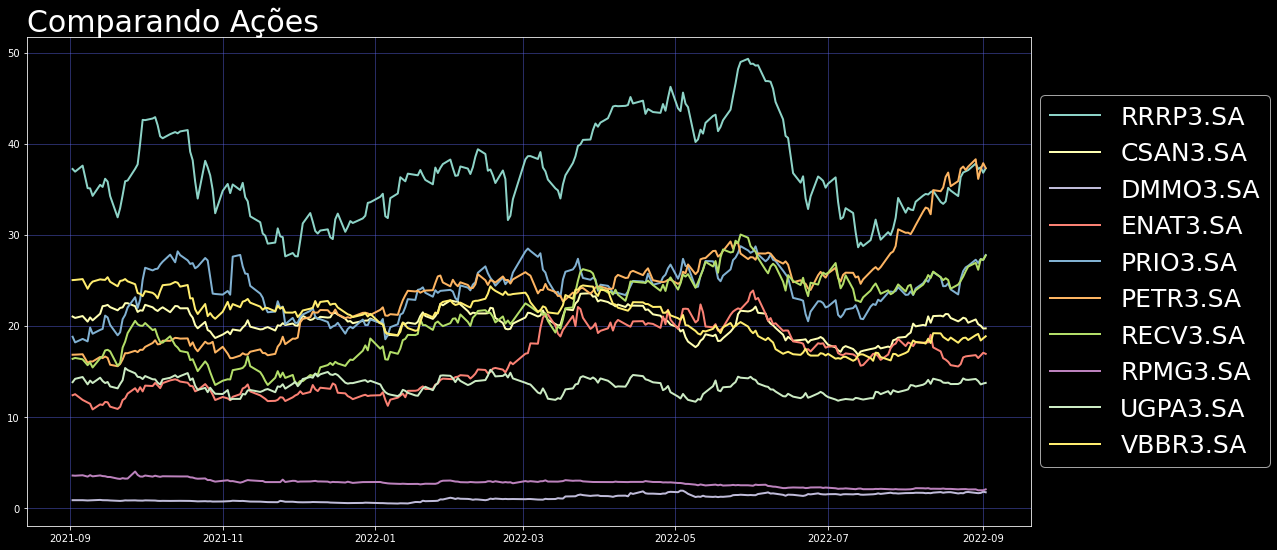

In [9]:
# Comparando as ações
compara_acoes()

## Ação RRRP: 3R PETROLEUM ÓLEO E GÁS S.A

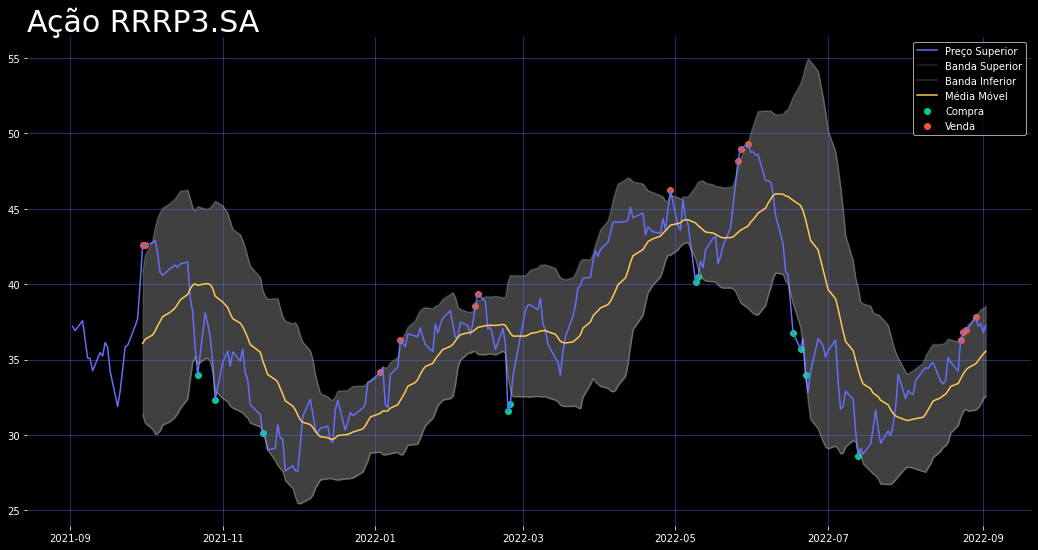

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 171022.44863700867
2022-09-02T00:00:00, Final PnL: 71022.45
Time used (seconds): 0.14366388320922852
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


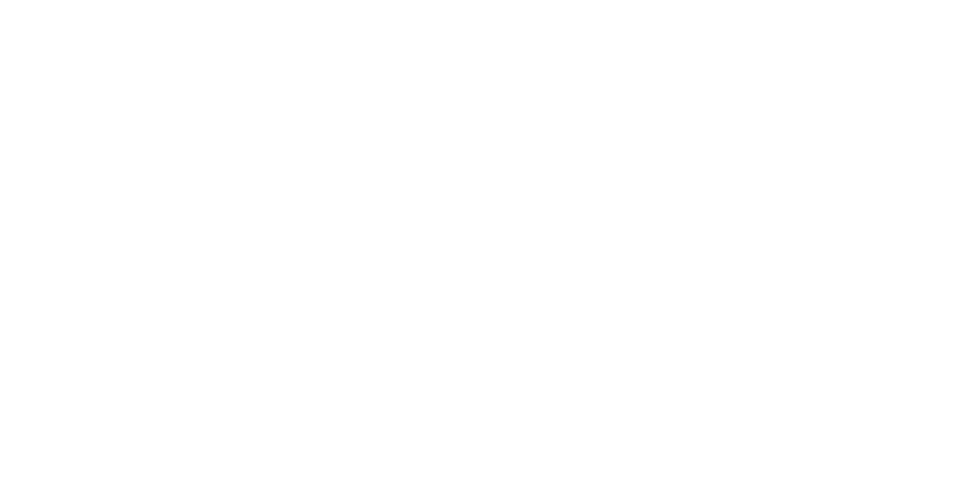

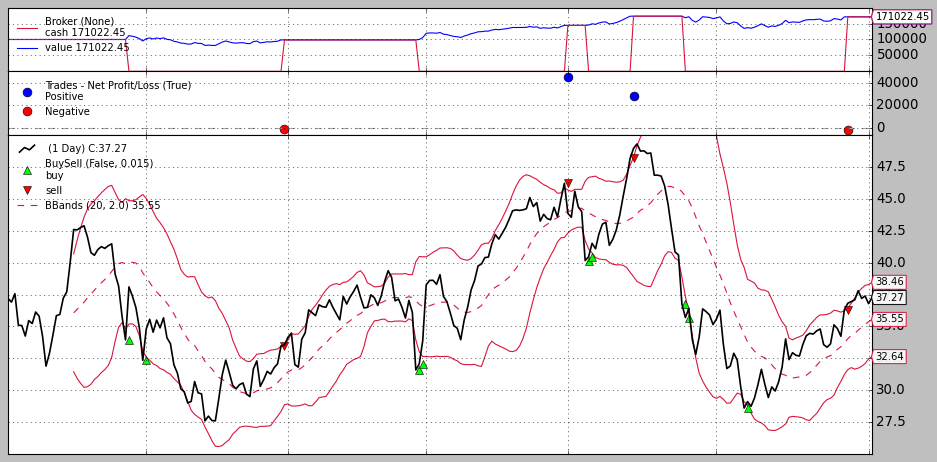

In [10]:
executa_funcoes_bollinger(lista_acoes[0])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: Ação RRRP: 3R PETROLEUM ÓLEO E GÁS S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100000
    2. Terminamos com um valor final "Final Portfolio Value" de: 171022
    3. O lucro foi de: 71.022

## Ação CSAN: COSAN S.A

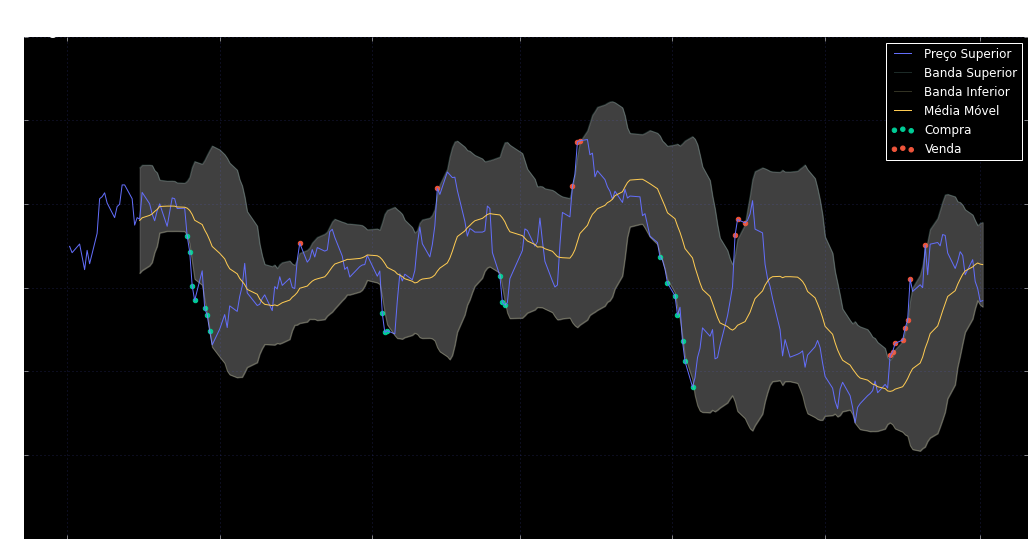

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 136143.41186141968
2022-09-02T00:00:00, Final PnL: 36143.41
Time used (seconds): 0.12710809707641602
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


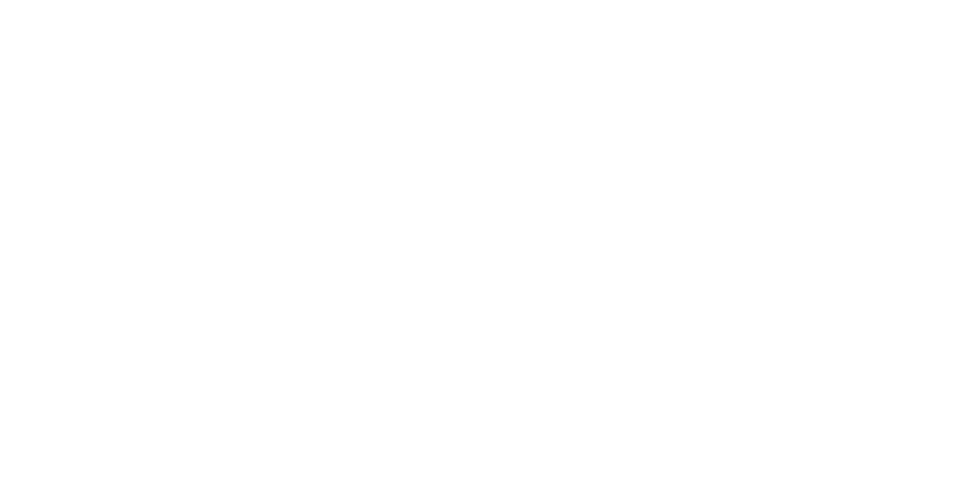

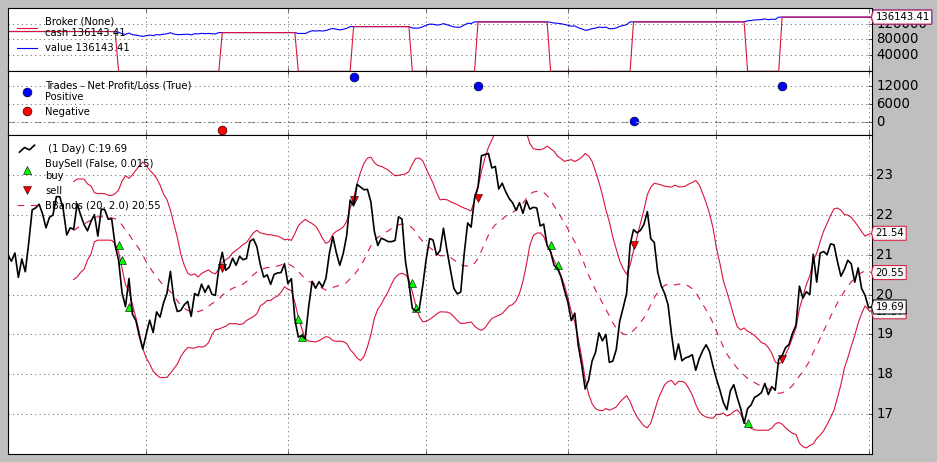

In [29]:
executa_funcoes_bollinger(lista_acoes[1])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: Ação CSAN: COSAN S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 136.143
    3. O lucro foi de: 36.143

## Ação DMMO: DOMMO ENERGIA S.A

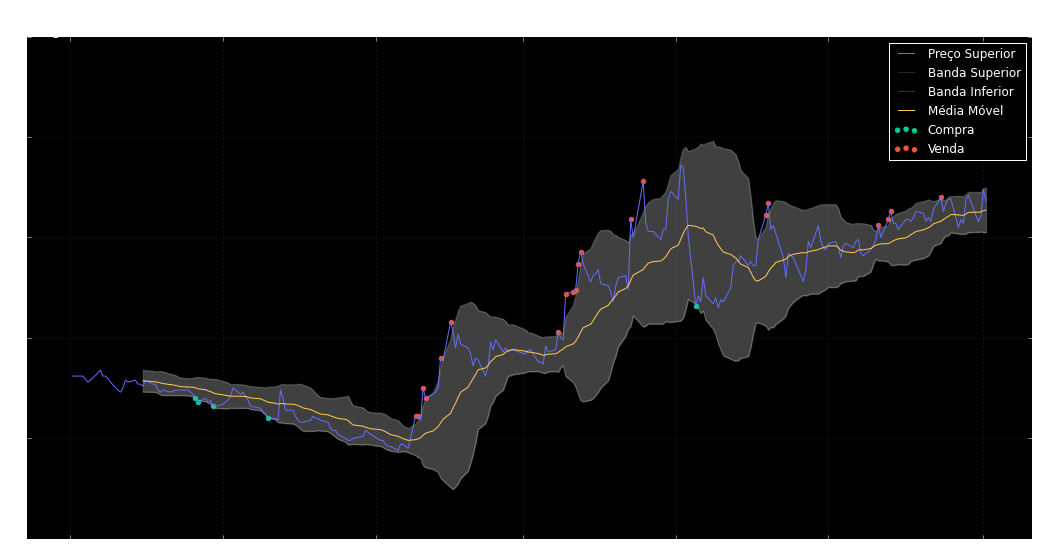

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 111911.95696467161
2022-09-02T00:00:00, Final PnL: 11911.96
Time used (seconds): 0.14710688591003418
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


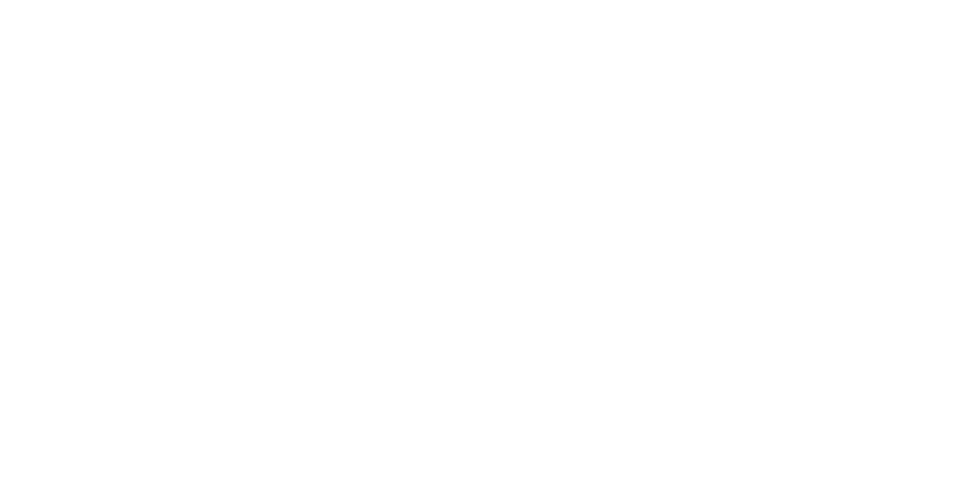

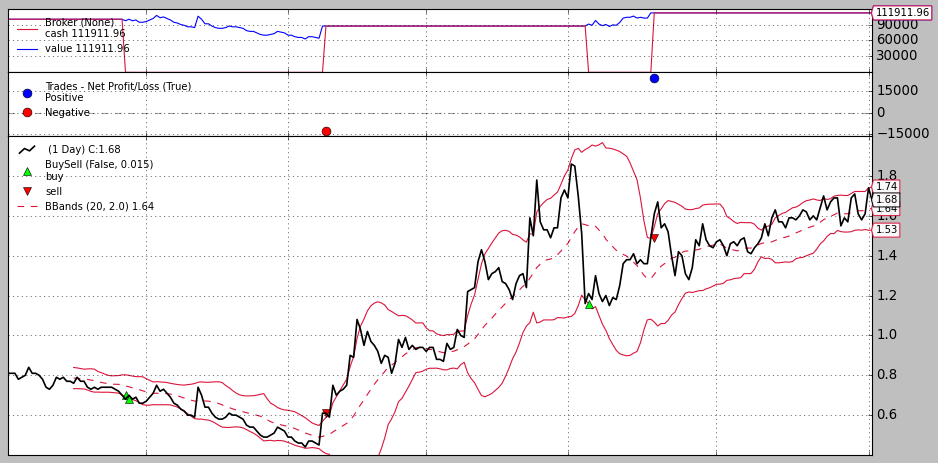

In [32]:
executa_funcoes_bollinger(lista_acoes[2])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: DMMO: DOMMO ENERGIA S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 111.911
    3. O Lucro foi de:  11.911

## Ação ENAT: ENAUTA PARTICIPAÇÕES S.A.

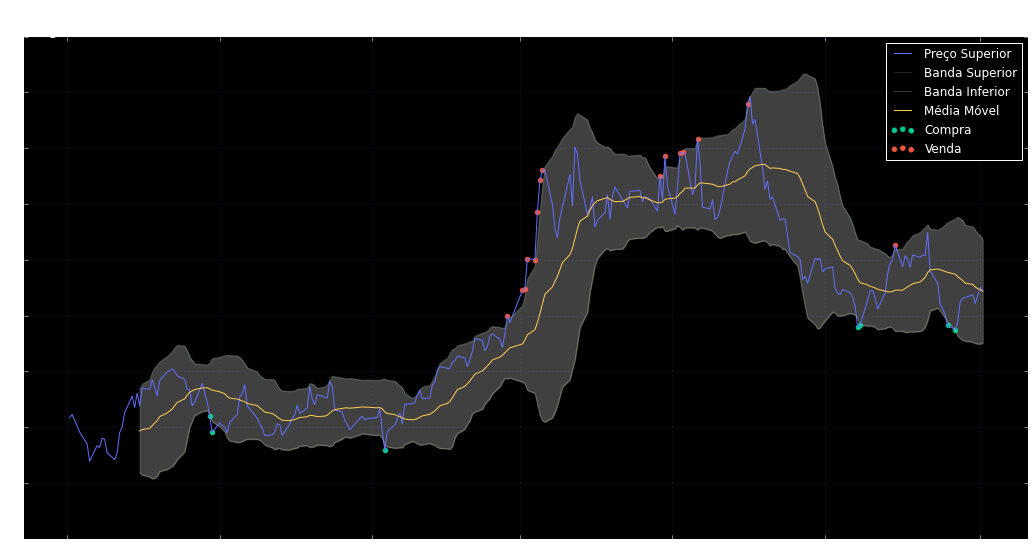

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 144913.39989376068
2022-09-02T00:00:00, Final PnL: 44913.4
Time used (seconds): 0.12646484375
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_a

<IPython.core.display.Javascript object>


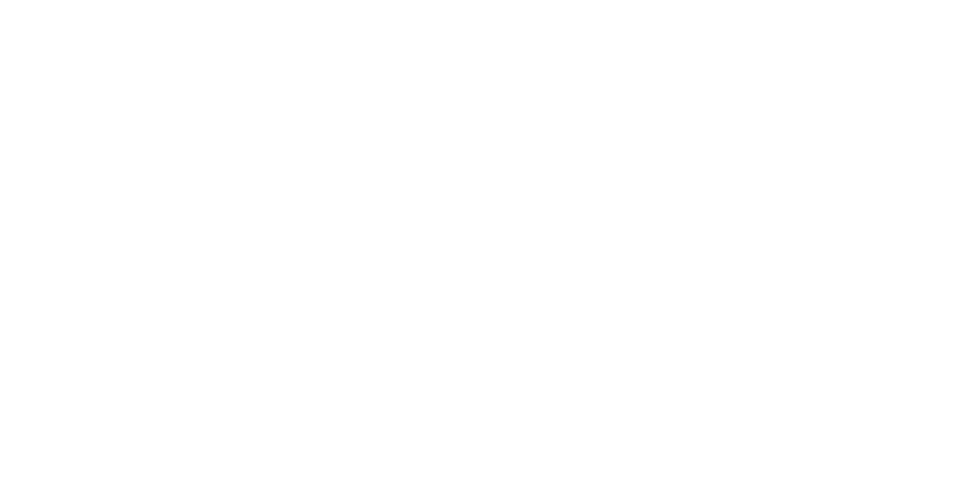

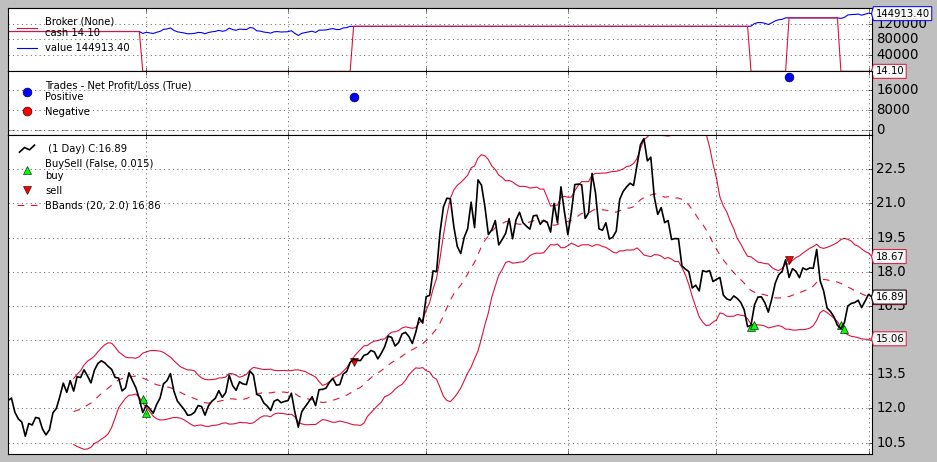

In [35]:
executa_funcoes_bollinger(lista_acoes[3])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: ENAT: ENAUTA PARTICIPAÇÕES S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 144.913
    3. O Lucro foi de: 44.913

## Ação PRIO: PETRO RIO S.A

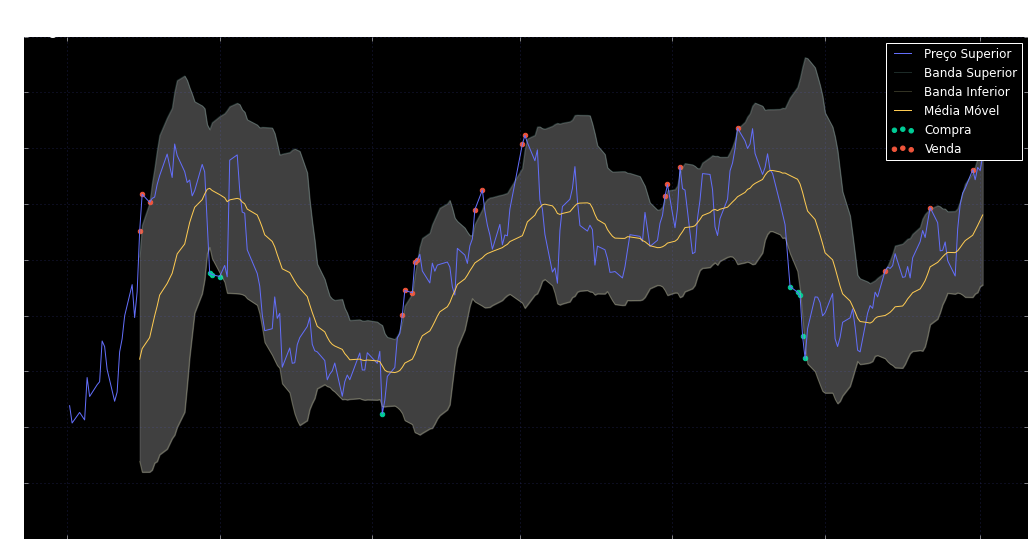

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 95981.03973960876
2022-09-02T00:00:00, Final PnL: -4018.96
Time used (seconds): 0.1277618408203125
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_c

<IPython.core.display.Javascript object>


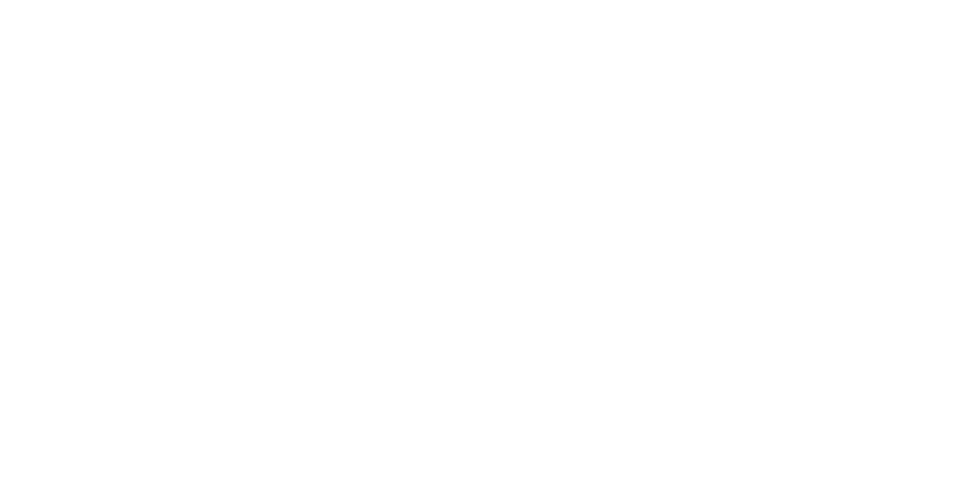

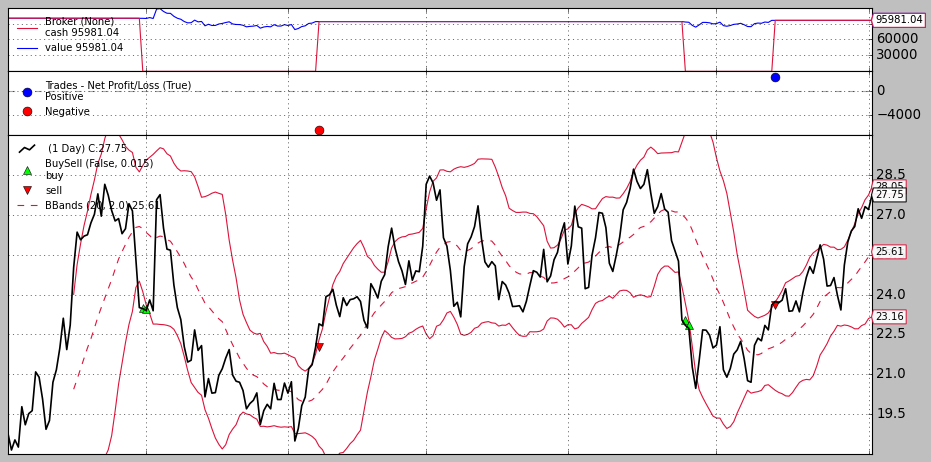

In [37]:
executa_funcoes_bollinger(lista_acoes[4])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: PRIO: PETRO RIO S.A.**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 95.981
    3. O Prejuízo foi de: -4.019

## Ação PETR: PETROLEO BRASILEIRO S.A. PETROBRAS

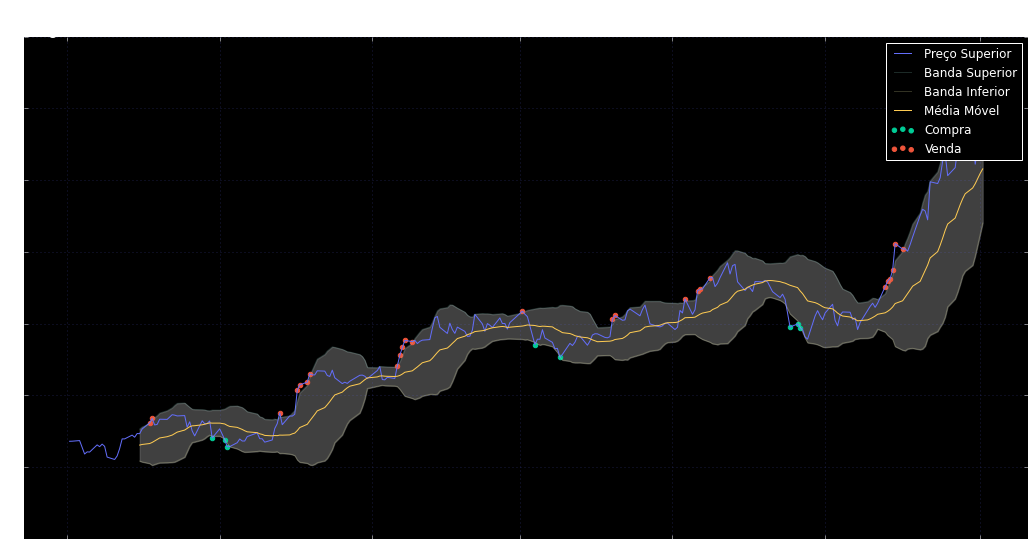

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 131841.45368766785
2022-09-02T00:00:00, Final PnL: 31841.45
Time used (seconds): 0.12987112998962402
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


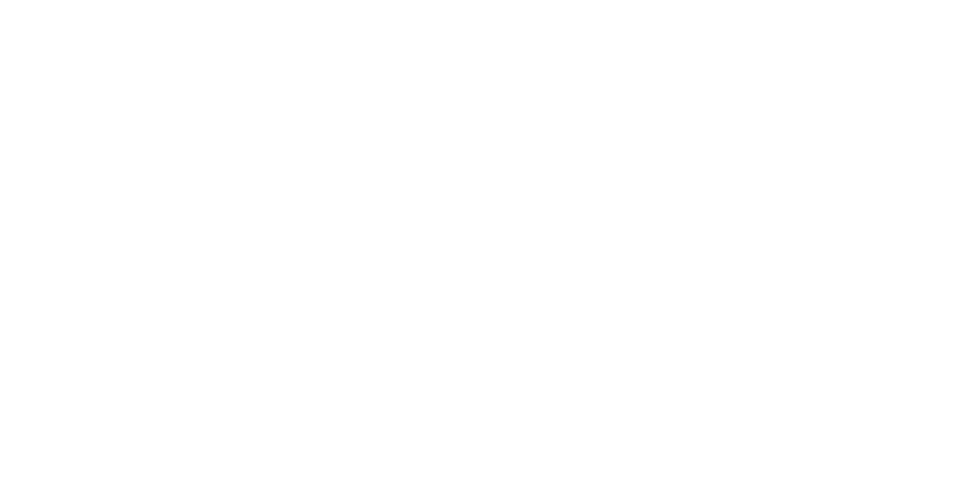

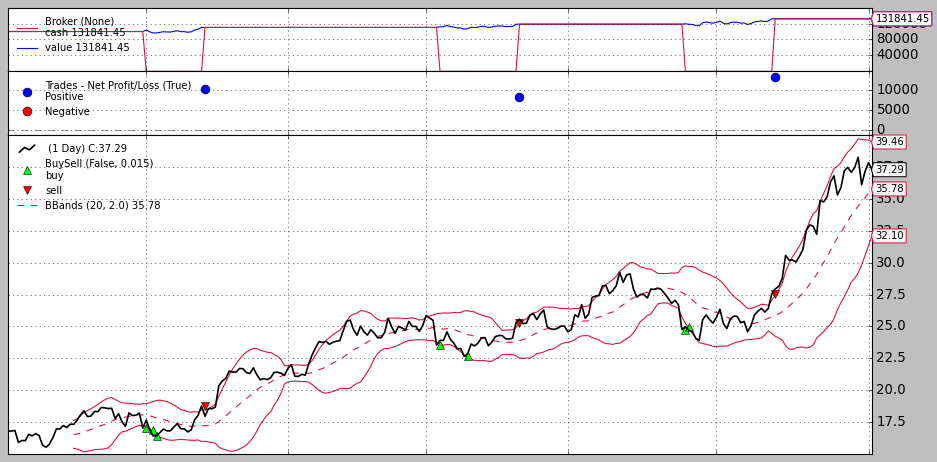

In [41]:
executa_funcoes_bollinger(lista_acoes[5])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: PETR: PETROLEO BRASILEIRO S.A. PETROBRAS**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 131.841
    3. O Lucro foi de: 31.841

## Ação RECV: PETRORECÔNCAVO S.A

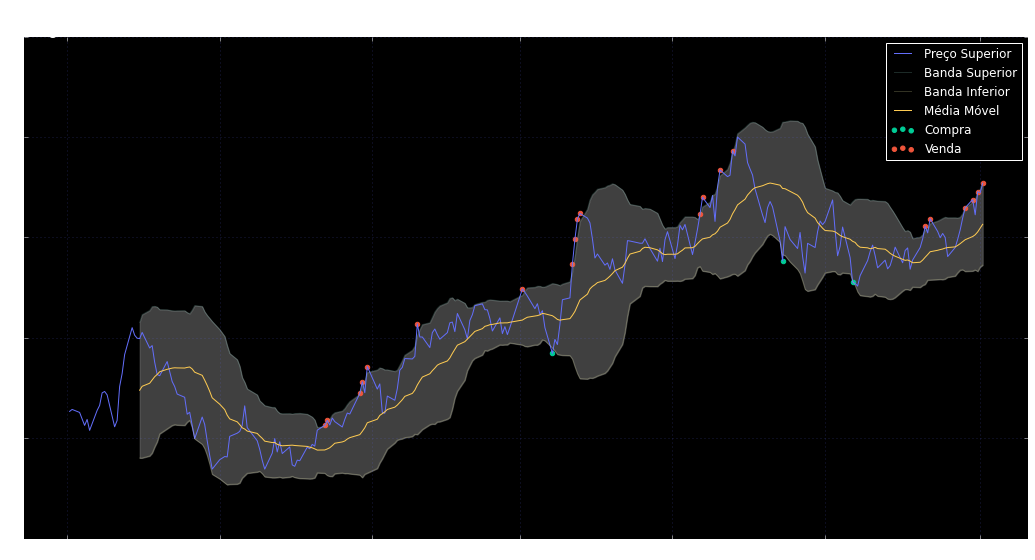

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 132365.48893356323
2022-09-02T00:00:00, Final PnL: 32365.49
Time used (seconds): 0.13764095306396484
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


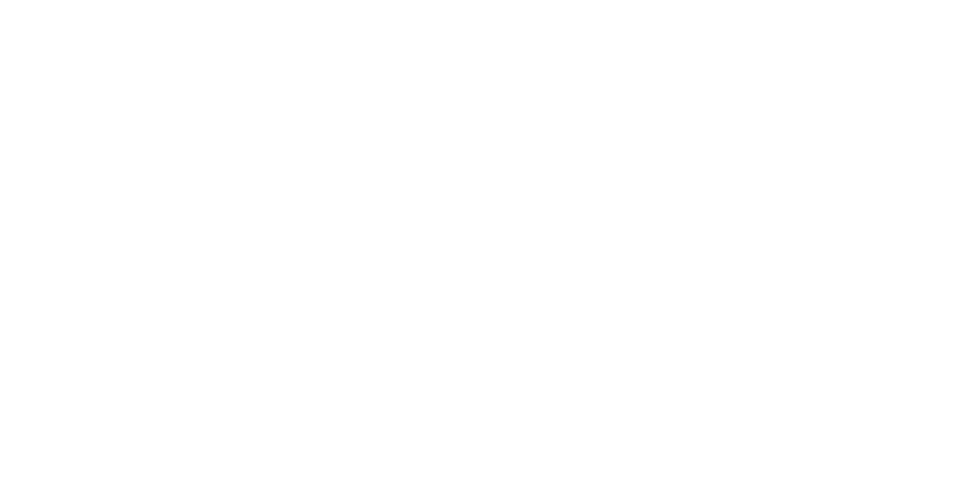

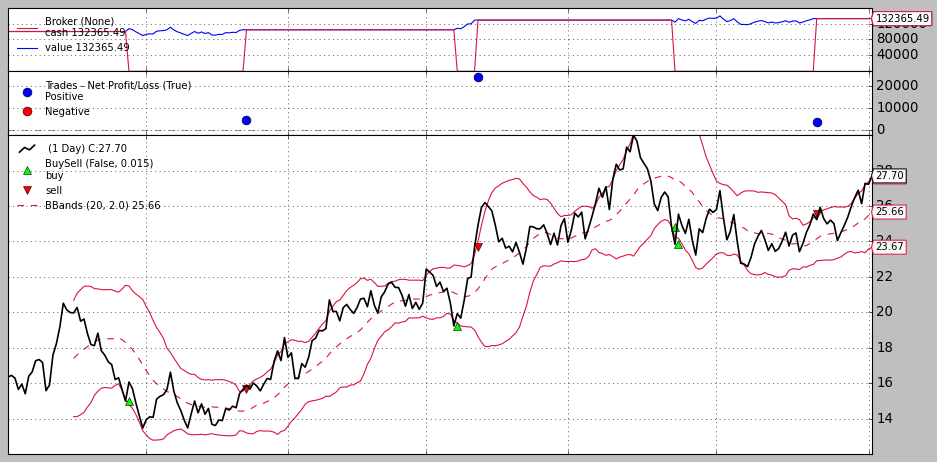

In [43]:
executa_funcoes_bollinger(lista_acoes[6])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: RECV: PETRORECÔNCAVO S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 132.365
    3. O Lucro foi de: 32.365

## Ação RPMG: REFINARIA DE PETROLEOS MANGUINHOS S.A

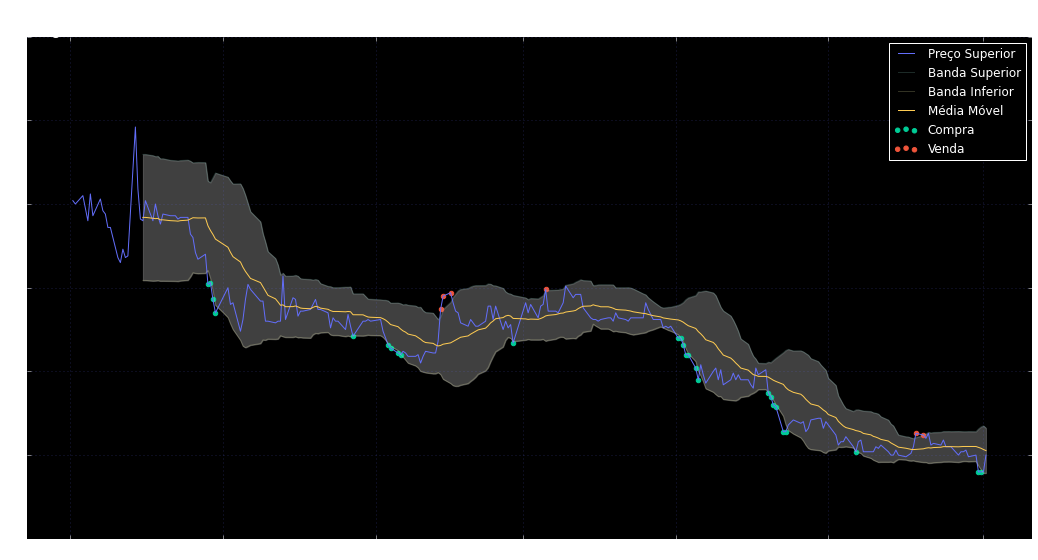

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 86446.10027706623
2022-09-02T00:00:00, Final PnL: -13553.9
Time used (seconds): 0.13217711448669434
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_

<IPython.core.display.Javascript object>


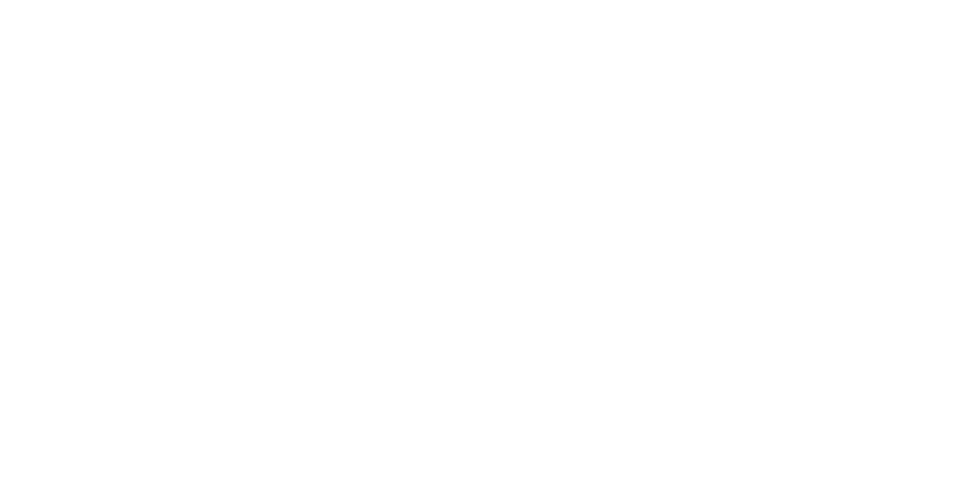

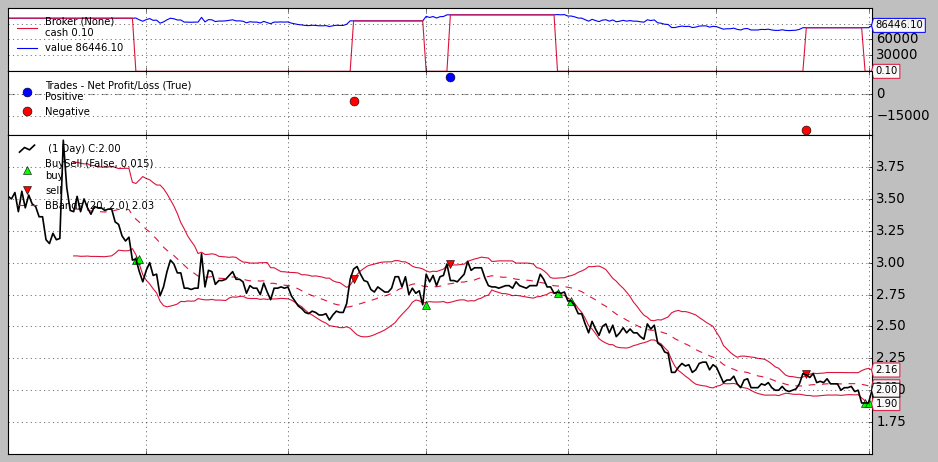

In [45]:
executa_funcoes_bollinger(lista_acoes[7])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: RPMG: REFINARIA DE PETROLEOS MANGUINHOS S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 86.446
    3. O Prejuízo foi de: -13.554

## Ação UGPA: ULTRAPAR PARTICIPACOES S.A

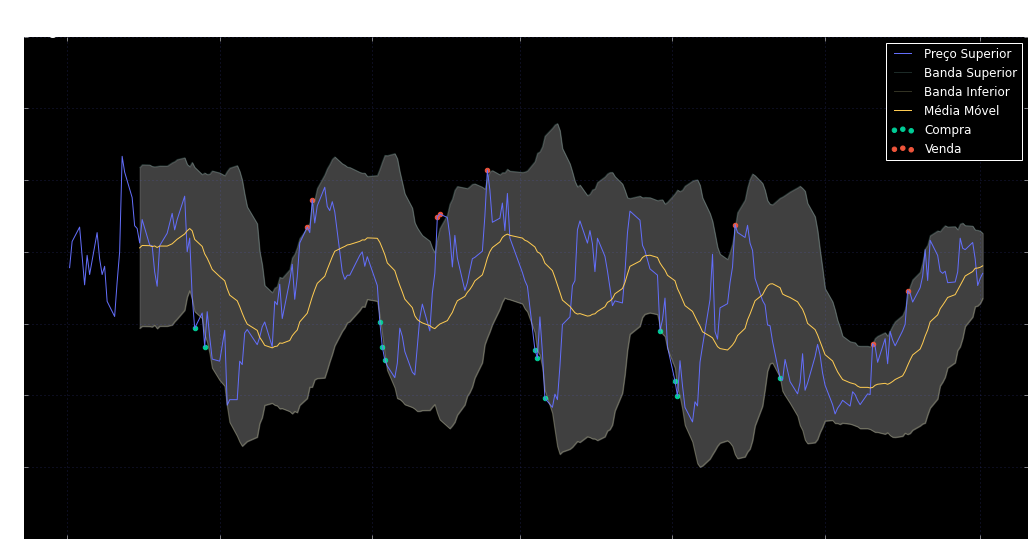

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 145889.28037834167
2022-09-02T00:00:00, Final PnL: 45889.28
Time used (seconds): 0.16192984580993652
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


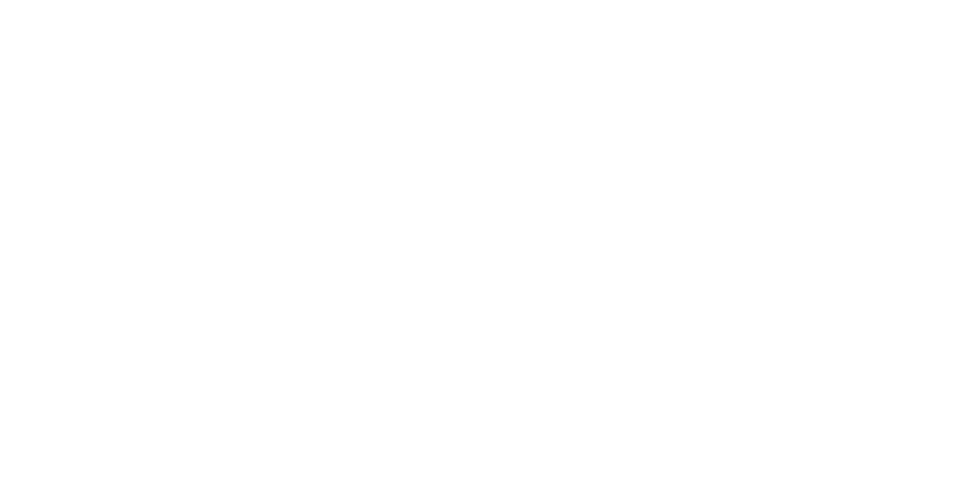

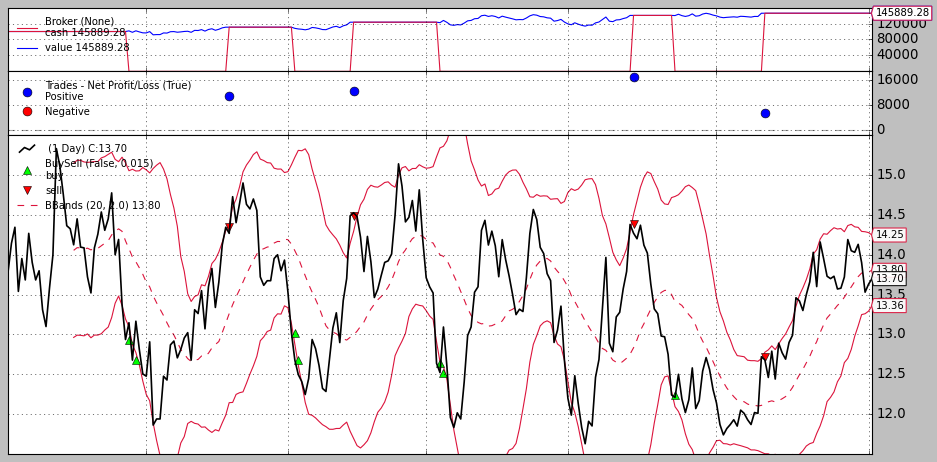

In [47]:
executa_funcoes_bollinger(lista_acoes[8])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: ULTRAPAR PARTICIPACOES S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 145.889
    3. O Lucro foi de: 45.889

## Ação VBBR: VIBRA ENERGIA S.A

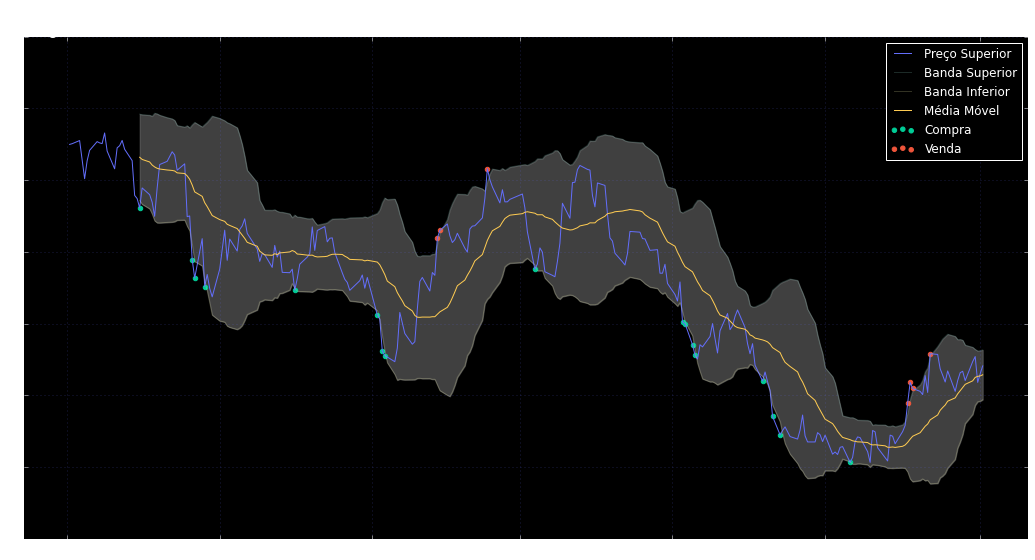

Starting Portfolio Value: 100000.00
2022-09-02T00:00:00, ===Global level arguments===
2022-09-02T00:00:00, init_cash : 100000
2022-09-02T00:00:00, buy_prop : 1
2022-09-02T00:00:00, sell_prop : 1
2022-09-02T00:00:00, commission : 0
2022-09-02T00:00:00, stop_loss : 0
2022-09-02T00:00:00, stop_trail : 0
2022-09-02T00:00:00, take_profit : 0
2022-09-02T00:00:00, allow_short : False
===Strategy level arguments===
period : 20
devfactor : 2.0
2022-09-02T00:00:00, Final Portfolio Value: 79639.54245567322
2022-09-02T00:00:00, Final PnL: -20360.46
Time used (seconds): 0.14016103744506836
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['bbands']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	fractional:False	slippage:0.001	single_position:None	commission:0	stop_loss:0	stop_trail:0	take_profit:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add

<IPython.core.display.Javascript object>


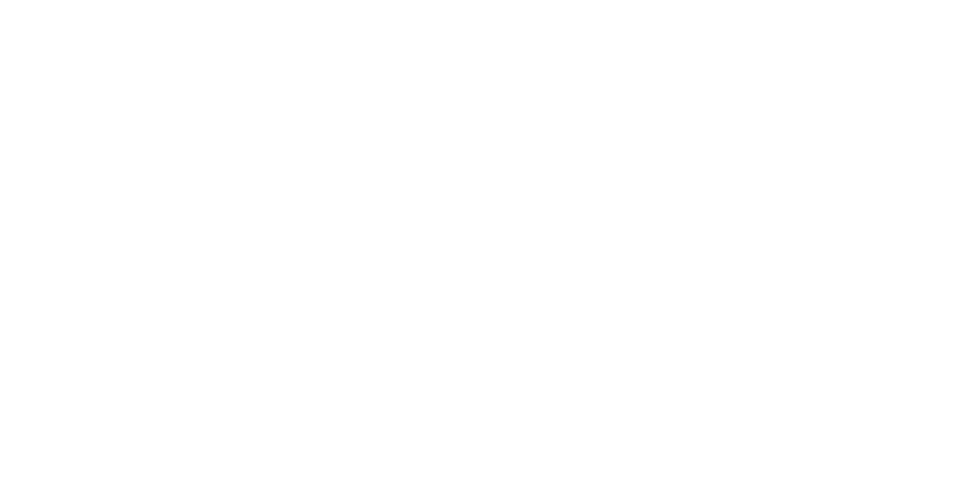

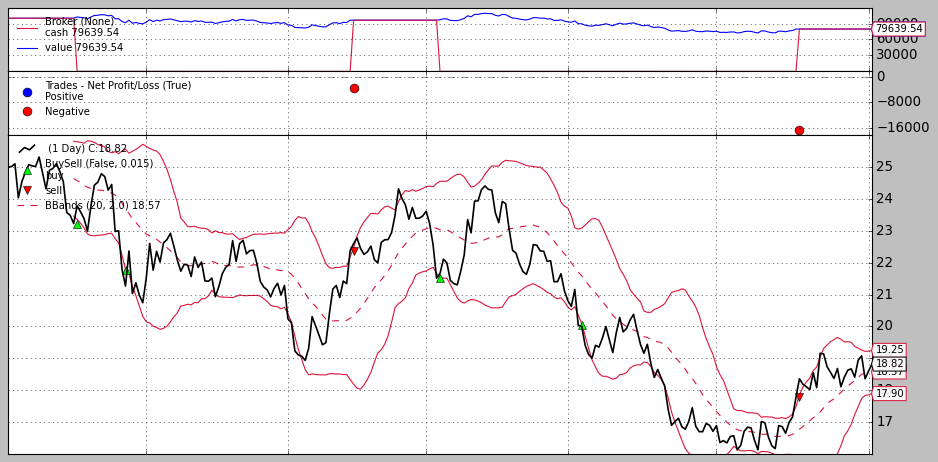

In [49]:
executa_funcoes_bollinger(lista_acoes[9])

**Análise de valores do Backtesting de usando as Bandas de Bollinger: VBBR: VIBRA ENERGIA S.A**

Com base nas informações abaixo podemos ver que:
    1. Começamos com um valor de investimento inicial "init_cash" de: 100.000
    2. Terminamos com um valor final "Final Portfolio Value" de: 79.639
    3. O Prejuízo foi de: -20361

## Análise de Variação de Preços

In [50]:
## Cria um dataframe com todas as ações
df = importa_acao(lista_acoes[0])
for i, nome_acao in enumerate(lista_acoes):
    if i > 0:
        df_2 = importa_acao(lista_acoes[i])
        df = df.merge(df_2, how='inner', on='Date')
df.columns = [lista_acoes]        

**Mostra as Estatísticos dos Preços de Cada Ação**

In [51]:
# Describe dos dados
df.describe()

,RRRP3.SA,CSAN3.SA,DMMO3.SA,ENAT3.SA,PRIO3.SA,PETR3.SA,RECV3.SA,RPMG3.SA,UGPA3.SA,VBBR3.SA
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,36.937450,20.402644,1.076892,16.107198,23.933904,23.968381,21.219574,2.687809,13.368624,20.938097
std,5.027493,1.484797,0.402573,3.450293,2.573423,5.161171,4.326532,0.433986,0.853321,2.520245
min,27.600000,16.770000,0.440000,10.782848,18.150000,15.528378,13.469584,1.900000,11.628749,16.129999
25%,33.565001,19.480729,0.730000,12.863586,21.990000,20.771951,17.219412,2.385000,12.678652,18.975000
50%,36.400002,20.559999,0.980000,15.980070,24.049999,24.456238,21.406305,2.800000,13.529696,21.414185
75%,40.700001,21.474466,1.465000,19.448984,26.005000,26.071296,24.836617,2.905000,14.040000,22.710178
max,49.310001,23.540611,1.860000,23.850000,28.719999,38.270000,30.000000,3.960000,15.331585,25.313696


In [52]:
# Visualizando
df.head(2)

,RRRP3.SA,CSAN3.SA,DMMO3.SA,ENAT3.SA,PRIO3.SA,PETR3.SA,RECV3.SA,RPMG3.SA,UGPA3.SA,VBBR3.SA
Date,,,,,,,,,,
2021-09-02,37.200001,20.987215,0.81,12.345714,18.77,16.796253,16.340313,3.52,13.779262,24.994673
2021-09-03,36.910000,20.836565,0.81,12.456687,18.15,16.802406,16.439646,3.50,14.143387,25.014189


In [53]:
## Muda o Formato dos dados para Detecção de Outliers 
df_2 = pd.DataFrame(df.unstack())
df_2 = df_2.reset_index()
df_2.columns = ['ACAO', 'DATA','VALORES']
df_2.head()

,ACAO,DATA,VALORES
0,RRRP3.SA,2021-09-02,37.200001
1,RRRP3.SA,2021-09-03,36.910000
2,RRRP3.SA,2021-09-06,37.570000
3,RRRP3.SA,2021-09-08,35.099998
4,RRRP3.SA,2021-09-09,35.070000


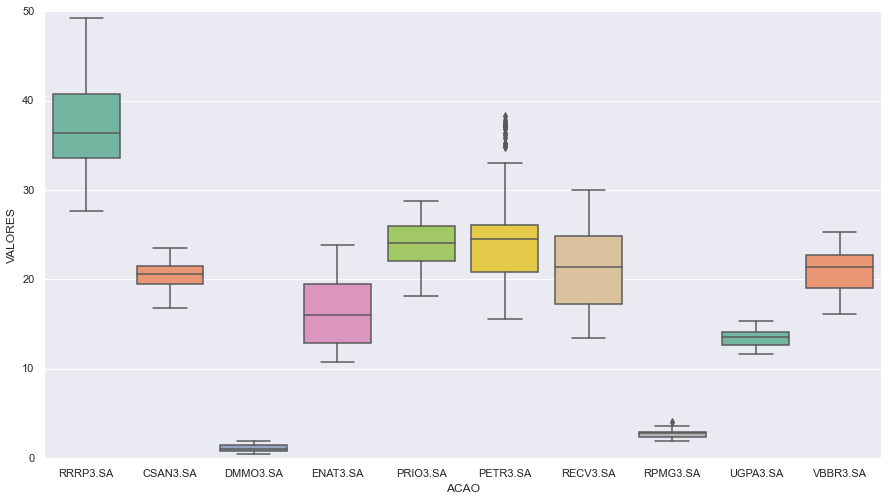

In [56]:
## Análise de Outliers
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x="ACAO", y="VALORES", data=df_2, palette="Set2")

## Conclusões

1. De acordo com a estratégia de backtest usando as Bandas de Bollinger as ações que dão mais lucro são:

    - RRRP: 71.022
    - UGPA: 45.889
    - ENAT: 44.913
    

2. De acordo com a estratégia de backtest usando as Bandas de Bollinger as ações que dão mais prejuízo são:

    - VBBR: -20361
    - RPMG: -13.554
    - PRIO: -4.019
    
    
3. De Acordo com as análises estatísticas de preços as ações com as maiores variações de preços são: 

    - PETR
    - RRRP
    - RECV3
    

4. A escolha das ações pode se basear no lucro obtido e na variação de preço:

    - Se for um investidor arrojado ele pode investir na RRRP e ter altos lucros, porém correndo um risco maior de perda já que essa carteira tem uma variação maior de preço;
    - Uma excelente opção de investimento para um perfil mais conservador é a carteira UGPA3 que tem uma variação menor de preços e retorna bons lucros.
    - Em segundo lugar para investimentos temos a ENAT que retorna bons lucros porém com uma variação de preço moderada.
    - As ações VBBR, RPMG e PRIO devem ser evitadas já que dão prejuízo 
    